In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score,classification_report
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
import seaborn as sns

In [2]:
data=pd.read_csv('food.csv')
print(data.head())

             Food_items  Breakfast  Lunch  Dinner  VegNovVeg  Calories  Fats  \
0      Asparagus Cooked          0      1       1          0        39   2.2   
1              Avocados          1      0       0          0       160  15.0   
2               Bananas          1      0       0          0        89   0.3   
3  Bagels made in wheat          0      1       1          0       250   1.5   
4               Berries          1      0       0          0        57   0.3   

   Proteins  Iron  Calcium  Sodium  Potassium  Carbohydrates  Fibre  VitaminD  \
0       2.4  0.91     23.0      14      224.0            4.1    2.0       0.0   
1       2.0  0.55     12.0       7      485.0            8.5    6.7       0.0   
2       1.1  0.26      5.0       1      358.0           23.0    2.6       0.0   
3      10.0  2.76     20.0     439      165.0           49.0    4.1       0.0   
4       0.7  0.00      6.0       1       77.0           14.5    2.4       0.0   

   Sugars  
0     1.3  
1     0.

In [3]:
def food_data():
    FoodsData = data
    FoodsData=FoodsData.T 
    val=list(np.arange(5,16))
    vals=[0]+[4]+val 
    FoodItemIDData=FoodsData.iloc[vals]
    FoodItemIDData=FoodItemIDData.T
    
    print(FoodItemIDData.head())

    return FoodItemIDData

In [37]:
def test_hierarchical_clustering():
    df=pd.read_csv('food.csv')
    print(df.head())
    dff = pd.read_csv('food.csv')
    from scipy.stats import zscore
    df.iloc[:, [5,6,7,12,13]]= df.iloc[:, [5,6,7,12,13]].apply(zscore)
    print(df.iloc[:, [5,6,7,12,13]].head())

    labelList = list(df.Food_items.unique())

    #Linkage using Ward's method
    link_method = linkage(df.iloc[:, [5,6,7,12,13]], method = 'ward')
    
    plt.figure()
    fig, ax = plt.subplots()

    dend = dendrogram(link_method,
                  labels = labelList,
                  truncate_mode='lastp', 
                  p=10)
    plt.show(fig)
    print(df.head())

    clusters = fcluster(link_method, 3, criterion='maxclust') 
    dff['HCluster'] = clusters
    print(dff.head())

    aggdata=dff.groupby('HCluster').mean()
    aggdata['Frequency']=dff.HCluster.value_counts().sort_index()
    print(aggdata.iloc[:, [4,5,6,11,12,15]])
    
    c_data_path = "/Users/hoaibao/DATN/DATN_ML/image"
    L = dff['Food_items']
    n_row = 6
    n_col=6
    for i in range(4):
        fig1 = plt.figure(figsize = (10, 5))
        fig, axs = plt.subplots(n_row, n_col, figsize=(7, 7))
        axs = axs.flatten()
        for img, ax in zip(L[ clusters == i][:36], axs):
            ax.imshow(mpimg.imread(os.path.join(c_data_path,img+'.jpeg')))
        plt.tight_layout()
        plt.show(fig)
        print('----------------------------------------------------------------------')

             Food_items  Breakfast  Lunch  Dinner  VegNovVeg  Calories  Fats  \
0      Asparagus Cooked          0      1       1          0        39   2.2   
1              Avocados          1      0       0          0       160  15.0   
2               Bananas          1      0       0          0        89   0.3   
3  Bagels made in wheat          0      1       1          0       250   1.5   
4               Berries          1      0       0          0        57   0.3   

   Proteins  Iron  Calcium  Sodium  Potassium  Carbohydrates  Fibre  VitaminD  \
0       2.4  0.91     23.0      14      224.0            4.1    2.0       0.0   
1       2.0  0.55     12.0       7      485.0            8.5    6.7       0.0   
2       1.1  0.26      5.0       1      358.0           23.0    2.6       0.0   
3      10.0  2.76     20.0     439      165.0           49.0    4.1       0.0   
4       0.7  0.00      6.0       1       77.0           14.5    2.4       0.0   

   Sugars  
0     1.3  
1     0.

<Figure size 432x288 with 0 Axes>

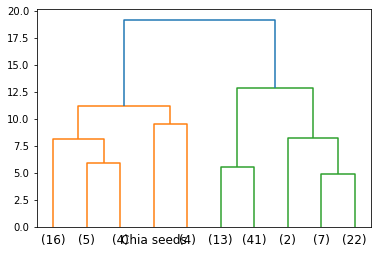

             Food_items  Breakfast  Lunch  Dinner  VegNovVeg  Calories  \
0      Asparagus Cooked          0      1       1          0 -1.031672   
1              Avocados          1      0       0          0 -0.202629   
2               Bananas          1      0       0          0 -0.689092   
3  Bagels made in wheat          0      1       1          0  0.414015   
4               Berries          1      0       0          0 -0.908343   

       Fats  Proteins  Iron  Calcium  Sodium  Potassium  Carbohydrates  \
0 -0.527609 -0.739529  0.91     23.0      14      224.0      -0.730041   
1  0.640448 -0.774248  0.55     12.0       7      485.0      -0.525847   
2 -0.700993 -0.852366  0.26      5.0       1      358.0       0.147064   
3 -0.591488 -0.079862  2.76     20.0     439      165.0       1.353662   
4 -0.700993 -0.887086  0.00      6.0       1       77.0      -0.247401   

      Fibre  VitaminD  Sugars  
0 -0.100218       0.0     1.3  
1  1.035373       0.0     0.7  
2  0.044751   

<Figure size 720x360 with 0 Axes>

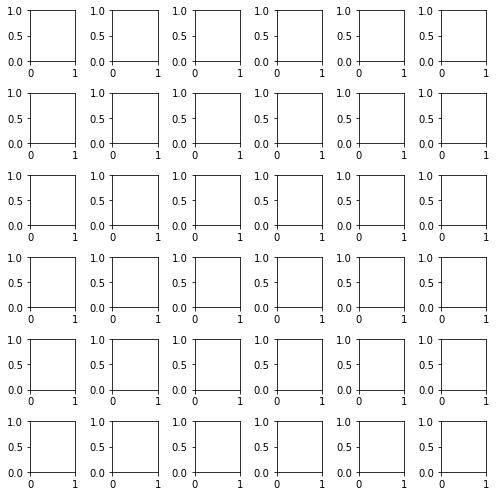

----------------------------------------------------------------------


<Figure size 720x360 with 0 Axes>

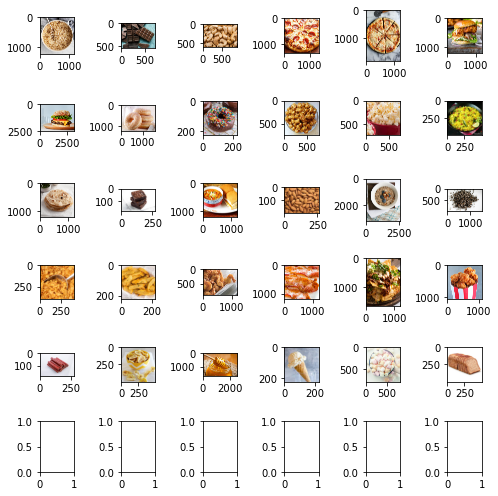

----------------------------------------------------------------------


<Figure size 720x360 with 0 Axes>

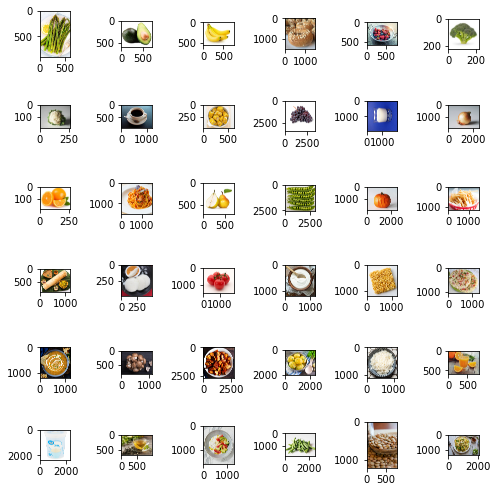

----------------------------------------------------------------------


<Figure size 720x360 with 0 Axes>

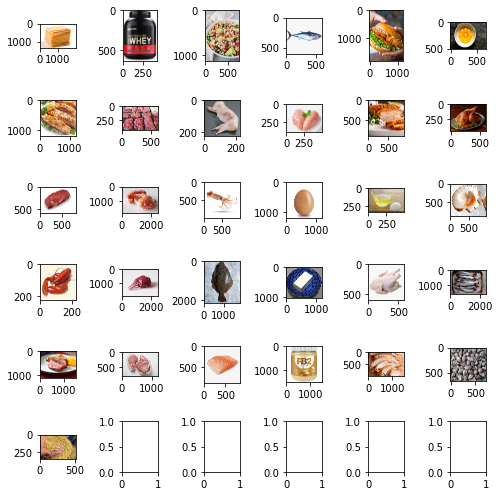

----------------------------------------------------------------------


In [38]:
test_hierarchical_clustering()

In [4]:
def cluster_food(FoodItemIDData, FoodItem_Test):
    ###### K-MEANS FOR ALL FOOD
    
    MealDatacalorie=FoodItemIDData[0:,2:len(FoodItemIDData)] #nutrion data
    MealDatacalorie = MealDatacalorie[:, [0,1,2,7,8]]

    S = StandardScaler()
    foods_scaled_data = S.fit_transform(MealDatacalorie)
    print(foods_scaled_data)

    k_means_meals = KMeans(init="k-means++", n_clusters=3, n_init=50, max_iter=500, random_state=42)
    k_means_meals.fit(foods_scaled_data)
    labels=k_means_meals.labels_

    FoodItem_Test['KMCluster'] = labels

    # Check Elbow plot
    wss =[] 
    for i in range(1,11):
        KM_Meals = KMeans(init="k-means++", n_clusters=i, n_init=50, max_iter=500, random_state=42)
        KM_Meals.fit(foods_scaled_data)
        wss.append(KM_Meals.inertia_)
    print(wss)
    fig = plt.figure(figsize = (10, 5))
    plt.plot(range(1,11), wss, marker = '*')
    plt.show(fig)

    # Check silhouette score
    for i in range(2,10):
        k_means_three_meals = KMeans(init="k-means++", n_clusters=i, n_init=50, max_iter=500, random_state=42)
        k_means_three_meals.fit(foods_scaled_data)
        print('WSS for K{}=:'.format(i),k_means_three_meals.inertia_)
        labels_three = k_means_three_meals.labels_
        print('Silhouette score for K{}=:'.format(i), silhouette_score(foods_scaled_data, labels_three))
        print('---------------------')
    
    # Overview data in clusters
    length = len(FoodItemIDData) + 2
    FoodItem_Test['KMCluster'] = labels
    clust_profile=FoodItem_Test.iloc[:,[2,3,4,9,10]].astype(float).groupby(FoodItem_Test['KMCluster']).mean()
    clust_profile['KMFrequency']=FoodItem_Test.KMCluster.value_counts().sort_index()
    clust = pd.DataFrame(clust_profile)
    print(clust)

#     c_data_path = "/Users/hoaibao/DATN/DATN_ML/image"
#     L = FoodItem_Test['Food_items']
#     n_row = 6
#     n_col=6
#     for i in range(3):
#         fig1 = plt.figure(figsize = (10, 5))
#         fig, axs = plt.subplots(n_row, n_col, figsize=(8, 8))
#         axs = axs.flatten()
#         for img, ax in zip(L[ k_means_meals.labels_ == i][:36], axs):
#             ax.imshow(mpimg.imread(os.path.join(c_data_path,img+'.jpeg')))
#         plt.tight_layout()
#         plt.show(fig)

    return labels

             Food_items VegNovVeg Calories  Fats Proteins  Iron Calcium  \
0      Asparagus Cooked         0       39   2.2      2.4  0.91    23.0   
1              Avocados         0      160  15.0      2.0  0.55    12.0   
2               Bananas         0       89   0.3      1.1  0.26     5.0   
3  Bagels made in wheat         0      250   1.5     10.0  2.76    20.0   
4               Berries         0       57   0.3      0.7   0.0     6.0   

  Sodium Potassium Carbohydrates Fibre VitaminD Sugars  
0     14     224.0           4.1   2.0      0.0    1.3  
1      7     485.0           8.5   6.7      0.0    0.7  
2      1     358.0          23.0   2.6      0.0   12.0  
3    439     165.0          49.0   4.1      0.0    6.1  
4      1      77.0          14.5   2.4      0.0   10.0  
[[-1.03167205e+00 -5.27609401e-01 -7.39528751e-01 -7.30040590e-01
  -1.00217745e-01]
 [-2.02628588e-01  6.40447508e-01 -7.74248056e-01 -5.25846977e-01
   1.03537327e+00]
 [-6.89092105e-01 -7.00992849e-01 -8.

[575.0, 374.7625483012072, 300.9424715310114, 235.2491988804994, 188.83937627601117, 155.00640336132855, 122.87101238026588, 105.97196053449508, 92.80576634245637, 82.6595228248258]


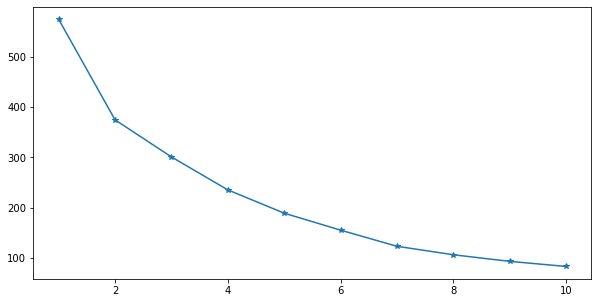

WSS for K2=: 374.7625483012072
Silhouette score for K2=: 0.4346390947262533
---------------------
WSS for K3=: 300.9424715310114
Silhouette score for K3=: 0.36021969513063806
---------------------
WSS for K4=: 235.2491988804994
Silhouette score for K4=: 0.3904130732099801
---------------------
WSS for K5=: 188.83937627601117
Silhouette score for K5=: 0.40189774633924724
---------------------
WSS for K6=: 155.00640336132855
Silhouette score for K6=: 0.4191209502068117
---------------------
WSS for K7=: 122.87101238026588
Silhouette score for K7=: 0.42226086796291523
---------------------
WSS for K8=: 105.97196053449508
Silhouette score for K8=: 0.43524979938557123
---------------------
WSS for K9=: 92.80576634245637
Silhouette score for K9=: 0.4289848748724974
---------------------
             Calories       Fats   Proteins  Carbohydrates     Fibre  \
KMCluster                                                              
0          174.354839   7.267419  23.206452       3.122258  0.44

In [5]:
FoodItemIDData = food_data()

FoodNutrion = FoodItemIDData

FoodItemIDData=FoodItemIDData.to_numpy()
  
foodlbs = cluster_food(FoodItemIDData, FoodNutrion)